## Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

## Importing Datasets

In [ ]:
airline_data=pd.read_excel('/content/Airlines+Data.xlsx')
airline_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


## Data Understanding

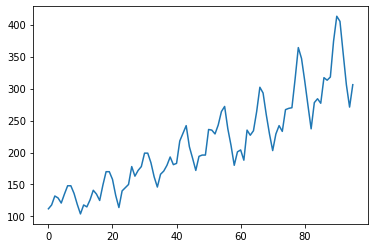

In [ ]:
airline_data.Passengers.plot()

In [ ]:
airline_data.shape

(96, 2)

In [ ]:
airline_data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [ ]:
airline_data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [ ]:
airline_data[airline_data.duplicated()]

,Month,Passengers


In [ ]:
airline_data['month']=airline_data.Month.dt.strftime('%b')
airline_data['year']=airline_data.Month.dt.strftime('%Y')
airline_data

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


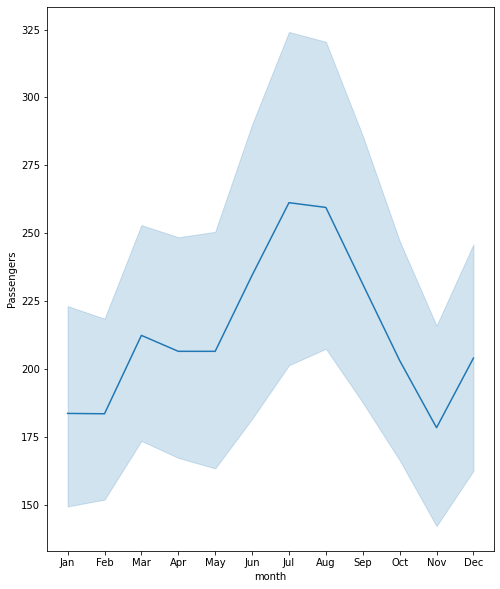

In [ ]:
plt.figure(figsize=(8,10))
sns.lineplot(x=airline_data['month'],y=airline_data['Passengers'])
plt.show()

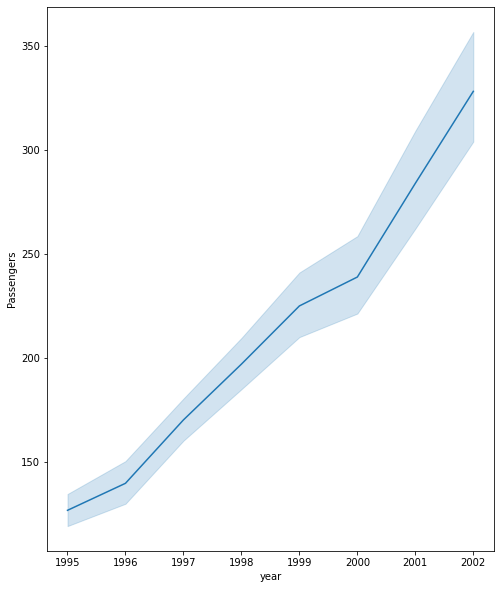

In [ ]:
plt.figure(figsize=(8,10))
sns.lineplot(x='year',y='Passengers',data=airline_data)
plt.show()

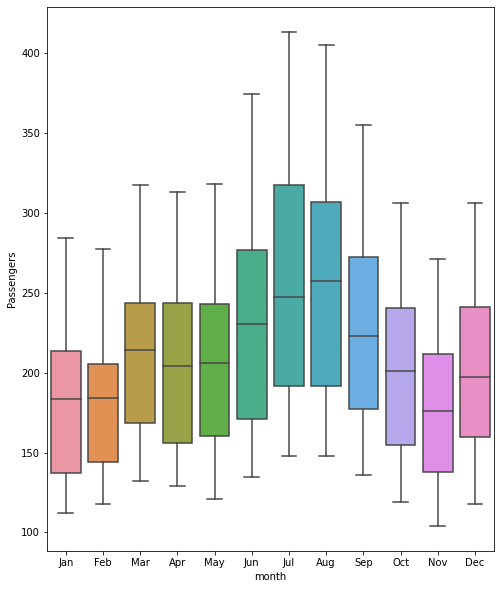

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(x=airline_data['month'],y=airline_data['Passengers'])
plt.show()

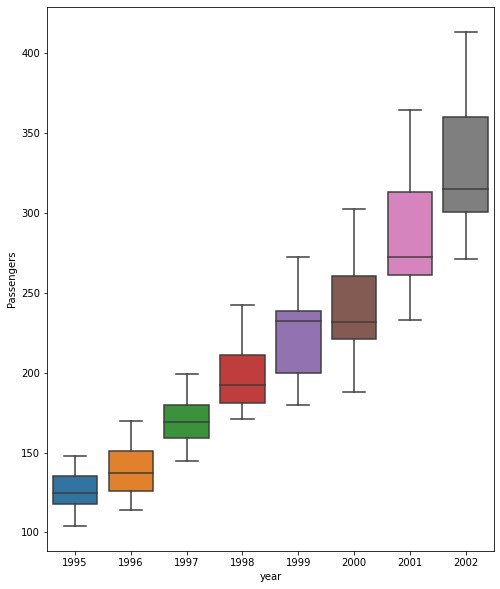

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(x='year',y='Passengers',data=airline_data)
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoded=OneHotEncoder()

In [ ]:
month_data=airline_data.drop(columns=['Month','Passengers','year'])
month_data

,month
0,Jan
1,Feb
2,Mar
3,Apr
4,May
...,...
91,Aug
92,Sep
93,Oct
94,Nov


In [ ]:
airline_data_1=pd.get_dummies(airline_data,columns=['month'])
airline_data_1

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
t=list(range(0,96))
airline_data_1['t']=pd.DataFrame(t)
airline_data_1

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,2
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,3
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0,91
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1,92
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0,93
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0,94


In [ ]:
airline_data_1['t_square'] =airline_data_1['t']*airline_data_1['t']
airline_data_1

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t,t_square
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,2,4
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,3,9
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,4,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0,91,8281
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1,92,8464
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0,93,8649
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0,94,8836


In [ ]:
import numpy as np
airline_data_1['Pass_Log']=np.log(airline_data_1['Passengers'])
airline_data_1

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t,t_square,Pass_Log
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,1,1,4.770685
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,2,4,4.882802
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,3,9,4.859812
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,4,16,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0,91,8281,6.003887
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1,92,8464,5.872118
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0,93,8649,5.723585
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0,94,8836,5.602119


# Splitting data

In [ ]:
Train = airline_data_1
Test = airline_data_1.tail(6)
Train


,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t,t_square,Pass_Log
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,1,1,4.770685
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,2,4,4.882802
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,3,9,4.859812
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,4,16,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0,91,8281,6.003887
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1,92,8464,5.872118
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0,93,8649,5.723585
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0,94,8836,5.602119


In [ ]:
#Linear Model
linear_model=smf.ols('Passengers~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear


61.41788792478224

In [ ]:
#Exponential

Expo_model=smf.ols('Pass_Log~t',data=Train).fit()
pred_Expo=pd.Series(Expo_model.predict(pd.DataFrame(Test['t'])))
pred_Expo=np.exp(pred_Expo)
rmse_Expo=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Expo))**2))
rmse_Expo


59.38808408658186

In [ ]:
#Quadratic 

Quad_model=smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad=pd.Series(Quad_model.predict(pd.DataFrame(Test[['t','t_square']])))
rmse_Quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

58.99448050161079

In [ ]:
#Additive seasonality 

Add_sea_model=smf.ols('Passengers~month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_Add_sea=pd.Series(Add_sea_model.predict(pd.DataFrame(Test[['month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']])))
rmse_Add_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Add_sea))**2))
rmse_Add_sea


121.84623592189192

In [ ]:
#Additive Seasonality Quadratic 

Add_Sec_quad_model=smf.ols('Passengers~t+t_square+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_Add_Sec_quad=pd.Series(Add_Sec_quad_model.predict(pd.DataFrame(Test[['t','t_square','month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']])))
rmse_Add_Sec_quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Add_Sec_quad))**2))
rmse_Add_Sec_quad


,Passengers
90,371.876993
91,371.087153
92,343.797312
93,316.632471
94,292.842631
95,319.427790


In [ ]:
##Multiplicative Seasonality

Mul_model=smf.ols('Pass_Log~month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_Mul=pd.Series(Mul_model.predict(pd.DataFrame(Test[['month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']])))
pred_Mul=np.exp(pred_Mul)
rmse_Mul=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Mul))**2))
rmse_Mul

132.8847102217589

In [ ]:
#Multiplicative Additive Seasonality 

Mul_Add_sea_model=smf.ols('Pass_Log~t+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_Mul_Add_sea=pd.Series(Mul_Add_sea_model.predict(pd.DataFrame(Test[['t','month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']])))
pred_Mul_Add_sea=np.exp(pred_Mul_Add_sea)
rmse_Mul_Add_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Mul_Add_sea))**2))
rmse_Mul_Add_sea

8.85507650711493

In [ ]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Expo","rmse_Quad","rmse_Add_sea","rmse_Add_Sec_quad","rmse_Mul","rmse_Mul_Add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Expo,rmse_Quad,rmse_Add_sea,rmse_Add_Sec_quad,rmse_Mul,rmse_Mul_Add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mul_Add_sea,8.855077
4,rmse_Add_Sec_quad,24.957092
2,rmse_Quad,58.994481
1,rmse_Expo,59.388084
0,rmse_linear,61.417888
3,rmse_Add_sea,121.846236
5,rmse_Mul,132.884710


 ## RMSE value for the Multiplicative Additive Seasonality Additive Seasonality Model is lowest so we can use this model for the Forcasting.